**Objective: To predict whether a patient will survive a breast cancer operation or not after 5 years of operation based on the features(age, operating year and number of positive axillary nodes)**

In [ ]:
#### importing the packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# loading Haberman's Cancer Survival Dataset
haberman = pd.read_csv('./haberman.csv')

In [ ]:
#### No.of data points and features
print(haberman.shape)

(306, 4)


In [ ]:
#### Column names in our dataset
print(haberman.columns)

Index(['Age', 'Op_Year', 'Axil_Node', 'Surv_Status'], dtype='object')


This dataset has 4 columns.

In [ ]:
#viewing some datapoints
haberman.head(10)

,Age,Op_Year,Axil_Node,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [ ]:
#Detailed information of Haberman Dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age            306 non-null int64
Op_Year        306 non-null int64
Axil_Node      306 non-null int64
Surv_Status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [ ]:
#More about the dataset
haberman.describe()

,Age,Op_Year,Axil_Node,Surv_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Explanation:**     


In [ ]:
#data points for each class
haberman["Surv_Status"].value_counts()

1    225
2     81
Name: Surv_Status, dtype: int64

**Observations:**      
1.Haberman Survival Dataset is an imbalanced dataset.      
2.There are 225 points (225 patients survived for 5 years or longer) under class 1, and 81 points (81 patients died within 5 years of operation) under class 2.  

# Univariate Analysis

## PDF

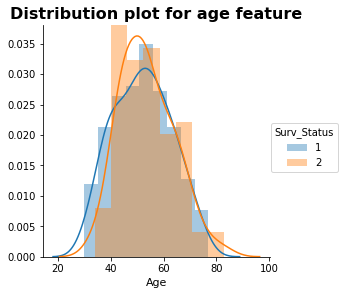

In [ ]:
# PDF of age feature
sns.FacetGrid(haberman,hue='Surv_Status',size=4) \
    .map(sns.distplot,"Age") \
    .add_legend()
plt.title('Distribution plot for age feature', fontweight="bold", size="16")    
plt.xlabel("Age",size=11)
plt.show()

**Observations:**    
1.The histogram almost is overlapping each other, no must observations can be made.              
2.The people within range of 40-59 age is more likely to die.              
3.People less than age 40 are more likely to survive.                                
4.Within the age group 34-76 the patient have both the possibility.

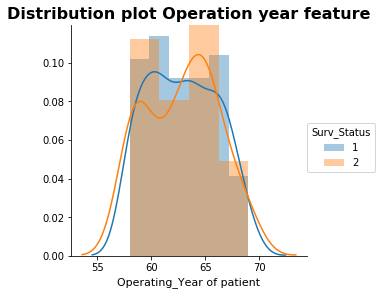

In [ ]:
# PDF of Operating year feature
sns.FacetGrid(haberman,hue='Surv_Status',size=4) \
    .map(sns.distplot,"Op_Year") \
    .add_legend()
plt.title("Distribution plot Operation year feature",fontweight="bold",size=16)
plt.xlabel('Operating_Year of patient',size=11)
plt.show()

**Observations:**  
1.Patients chances to survive for 5yrs or more is greater between 1958-62.    
2.Large number of people died within the operating year 62-66.

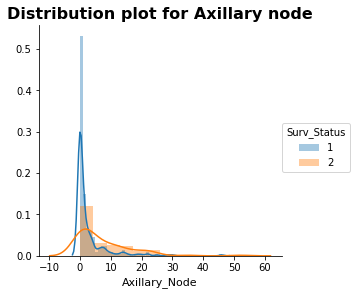

In [ ]:
# PDF of Axillary Node feature
sns.FacetGrid(haberman,hue='Surv_Status',size=4) \
    .map(sns.distplot,"Axil_Node") \
    .add_legend()
plt.title("Distribution plot for Axillary node", fontweight="bold", size=16)
plt.xlabel("Axillary_Node",size=11)
plt.show()

**Observations:**             
1.By observing the pdf of axilliary node, patients having zero(0) axil nodes are most likely to survive after operating.  
2.Patients chances to survive is less if positive lymph nodes count is >3. 

## CDF

In [ ]:
haberman_surv = haberman.loc[haberman["Surv_Status"] == 1]
haberman_died = haberman.loc[haberman["Surv_Status"] == 2]


For patients survived:-
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

For patients died:-
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


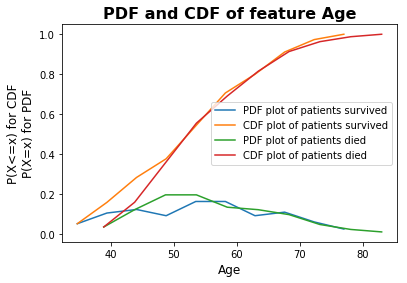

In [ ]:
###Plot of CDF & PDF of patients age

##For patients survived
print("\nFor patients survived:-")
counts, bin_edges = np.histogram(haberman_surv['Age'], bins=10, 
                                 density = True)
#compute PDF
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF plot of patients survived")
plt.plot(bin_edges[1:], cdf,label="CDF plot of patients survived")


##For patients died
print("\nFor patients died:-")
counts, bin_edges = np.histogram(haberman_died['Age'], bins=10, 
                                 density = True)
#compute PDF
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF plot of patients died")
plt.plot(bin_edges[1:], cdf,label="CDF plot of patients died")

##Title, label, legend
plt.title("PDF and CDF of feature Age",fontweight="bold",size=16)
plt.xlabel("Age",size=12)
plt.ylabel("P(X<=x) for CDF" + "\nP(X=x) for PDF",size=12)
plt.legend(loc="center right",frameon=True)
plt.show()

**Observations:**   
1.There is 40% of chance that Patients <49 yrs would be able to survive for 5 years or more.     
2.There is 5%-38% of chance that patients between 39-49 yrs won't be able to survive for 5 years.


For patients survived:-
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

For patients died:-
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


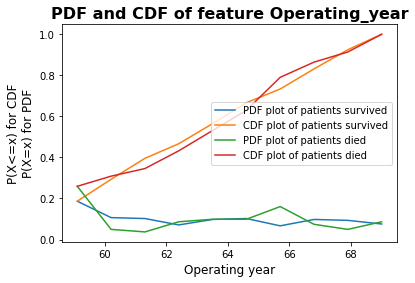

In [ ]:
###Plot of CDF & PDF of patients operating year

##For patients survived
print("\nFor patients survived:-")
counts, bin_edges = np.histogram(haberman_surv['Op_Year'], bins=10, 
                                 density = True)
#compute PDF
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF plot of patients survived")
plt.plot(bin_edges[1:], cdf,label="CDF plot of patients survived")


##For patients died
print("\nFor patients died:-")
counts, bin_edges = np.histogram(haberman_died['Op_Year'], bins=10, 
                                 density = True)
#compute PDF
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF plot of patients died")
plt.plot(bin_edges[1:], cdf,label="CDF plot of patients died")

plt.title("PDF and CDF of feature Operating_year",fontweight="bold",size=16)
plt.xlabel("Operating year",size=12)
plt.ylabel("P(X<=x) for CDF" + "\nP(X=x) for PDF",size=12)
plt.legend(loc="center right",frameon=True)
plt.show()

**Observations:**   
1.28% to 70% of patients undergone operation between year 1960-65 were able to survive for 5 years or longer.     
2.71% to 90% of patients undergone operation between year 1965-67 were not able to survive for 5 years.


For patients survived:-
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

For patients died:-
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


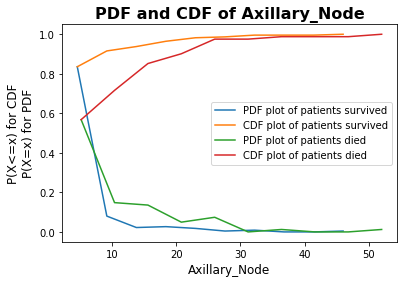

In [ ]:
###Plot of CDF & PDF of patients Axillary Node

##For patients survived
print("\nFor patients survived:-")
counts, bin_edges = np.histogram(haberman_surv['Axil_Node'], bins=10, 
                                 density = True)
#compute PDF
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF plot of patients survived")
plt.plot(bin_edges[1:], cdf,label="CDF plot of patients survived")

##For patients died
print("\nFor patients died:-")
counts, bin_edges = np.histogram(haberman_died['Axil_Node'], bins=10, 
                                 density = True)
#compute PDF
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF plot of patients died")
plt.plot(bin_edges[1:], cdf,label="CDF plot of patients died")

plt.title("PDF and CDF of Axillary_Node",fontweight="bold",size=16) 
plt.xlabel("Axillary_Node",size=12)
plt.ylabel("P(X<=x) for CDF" + "\nP(X=x) for PDF",size=12)
plt.legend(loc="center right",frameon=True)
plt.show()

**Observations:**   
More than 80% of patients with 5 or less axillary nodes survived for 5 years or longer.


## Box plot and Whiskers

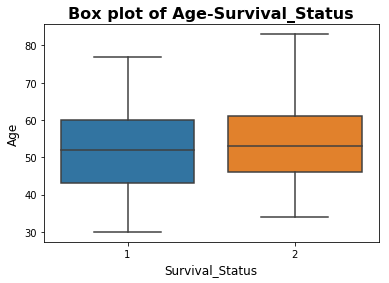

In [ ]:
sns.boxplot(x='Surv_Status',y='Age', data=haberman)
plt.title("Box plot of Age-Survival_Status",fontweight="bold",size=16)
plt.xlabel("Survival_Status",size=12)
plt.ylabel("Age",size=12)
plt.show()

**Observations:**       
1.Age group 42-46 are likely to survive without any danger i.e.Most of the patients with age < 45 yrs are able to survive for 5 yrs or longer.    
2.Almost 2% of Patients having age > 60 yrs were not able to survive for 5 yrs, however patients having age > 78 yrs are certainly not able to survive for 5 yrs.

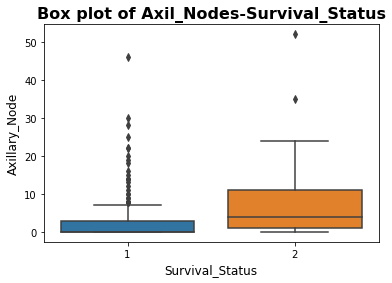

In [ ]:
sns.boxplot(x='Surv_Status',y='Axil_Node', data=haberman)
plt.title("Box plot of Axil_Nodes-Survival_Status",fontweight="bold",size=16)
plt.xlabel("Survival_Status",size=12)
plt.ylabel("Axillary_Node",size=12)
plt.show()

**Observations:**     
1.Patients having 0 nodes are more likely to survive.    
2.25% of Patients with 3 axillary nodes were able to survive for 5 years.    
3.More than 25% of Patients having >= 4 axillary nodes were not able to survive for 5 years.    
4.As the no. of nodes increases the risk to death increases (less the no. of axil, less risk of death).

## Violin plots

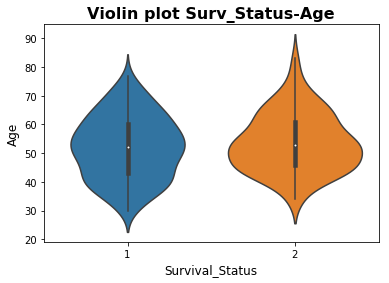

In [ ]:
sns.violinplot(x="Surv_Status", y="Age", data=haberman, size=5)      
plt.title("Violin plot Surv_Status-Age",fontweight="bold", size=16)
plt.xlabel("Survival_Status",size=12)
plt.ylabel("Age",size=12)
plt.show()

**Observations:**       
Depending upon the age feature we cannot perfectly determine the survival status.

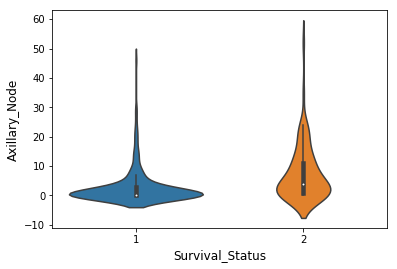

In [ ]:
sns.violinplot(x="Surv_Status", y="Axil_Node", data=haberman, size=5)
plt.xlabel("Survival_Status",size=12)
plt.ylabel("Axillary_Node",size=12)
plt.show()

**Observations:**       
Depending upon the axil-node feature we can observe less the axil-nodes less the risk to death.

# Bivariate Analysis

## 2-D Scatter Plot

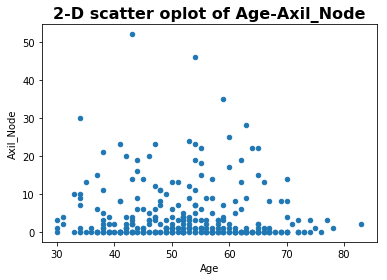

In [ ]:
haberman.plot(kind='scatter',x="Age",y='Axil_Node')
plt.title("2-D scatter oplot of Age-Axil_Node",fontweight="bold",size=16)
plt.show()

**Observations:**       
We cannot distinguish between the points as both are of same colour so we will be using seaborn for differentiation.

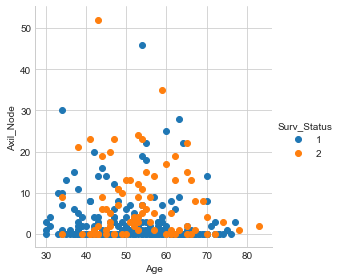

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="Surv_Status", size=4) \
   .map(plt.scatter, "Age", "Axil_Node") \
   .add_legend()
plt.show()

**Observations:**        
We can roughly observe that most of the patients who survived 5years or longer have nearly 0 axil node irrespective of their ages (more blue points are concentrated on zero axil nodes).

## Pairplot

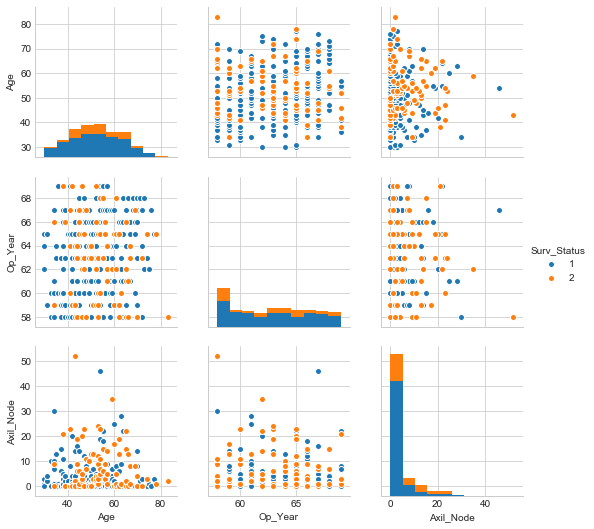

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue='Surv_Status',vars=['Age','Op_Year','Axil_Node'])
plt.show()

**Observations:**         
1.By observing the pair plots Age vs Axil_Node which is plot3 or Axil_Node vs Age which is plot7 gives a better understanding of survival status.       
2.In other pair plots the points are overlapped and because of which they are not lineraly seperable.

In [ ]:
#Mean  
print("Means :")
print(np.mean(haberman_surv["Age"]))

#Mean with an outlier.
print(np.mean(np.append(haberman_surv["Age"],306)))
print(np.mean(haberman_died["Age"]))

#Standard deviation
print("\nStd-dev :");
print(np.std(haberman_surv["Age"]))
print(np.std(haberman_died["Age"]))

#Median  
print("\nMedians:")
print(np.median(haberman_surv["Age"]))
print(np.median(haberman_died["Age"]))

#Quantiles
print("\nQuantiles:")
print(np.percentile(haberman_surv["Age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_died["Age"],np.arange(0, 100, 25)))

#Percentiles
print("\n90th Percentiles:")
print(np.percentile(haberman_surv["Age"],90))
print(np.percentile(haberman_died["Age"],90))

#IQR
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_surv["Age"]))
print(robust.mad(haberman_died["Age"]))

Means :
52.01777777777778
53.14159292035398
53.67901234567901

Std-dev :
10.98765547510051
10.10418219303131

Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# Overall Conclusions

## From PDF and CDF:

1. The people within range of 40-59 age is more likely to die.     
2. People less than age 40 are more likely to survive.     
3. Within the age group 34-76 the patient have both the possibility.          
4. Large number of people died within the operating year 62-66.      
5. By observing the pdf of axilliary node, patients having zero(0) axil nodes are most likely to survive after operating.     
6. Patients chances to survive is less if positive lymph nodes count is >3.  
7. 28% to 70% of patients undergone operation between year 1960-65 were able to survive for 5 years or longer.
8. 71% to 90% of patients undergone operation between year 1965-67 were not able to survive for 5 years.

## From Box plot and violin plot:

1. Age group 42-46 are likely to survive without any danger i.e.Most of the patients with age < 45 yrs are able to survive for 5 yrs or longer.     
2. Almost 2% of Patients having age > 60 yrs were not able to survive for 5 yrs, however patients having age > 78 yrs are certainly not able to survive for 5 yrs.     
3. Patients having 0 nodes are more likely to survive.
4. 25% of Patients with 3  axillary nodes were able to survive for 5 years.     
5. More than 25% of Patients having >= 4 axillary nodes were not able to survive for 5 years.     
6. As the no. of nodes increases the risk to death increases (less the no. of axil, less risk of death).

## From Scatter plots and Pairplots:

1. We can roughly observe that most of the patients who survived 5years or longer have nearly 0 axil node irrespective of their ages (more blue points are concentrated on zero axil nodes).     
2. By observing the pair plots Age vs Axil_Node which is plot3 or Axil_Node vs Age which is plot7 gives a better understanding of survival status.     
3. In other pair plots the points are overlapped and because of which they are not lineraly seperable.